<a href="https://colab.research.google.com/github/itan-s/Prediction-of-Product-Sales/blob/main/Prediction-of-Product-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Kristan Bryan Simbulan

##Project Overview

This project is a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

The dataset to be used is sourced from the **Big Mart Sales Practice Problem** at Analytics Vidhya.


The dataset dictionary is as follows:

* ***Item_Identifier*** -	Product ID

* ***Item_Weight***	- Weight of product

* ***Item_Fat_Content*** - Whether the product is low-fat or regular

* ***Item_Visibility***	- The percentage of total display area of all products in a store allocated to the particular product

* ***Item_Type*** -	The category to which the product belongs

* ***Item_MRP***	- Maximum Retail Price (list price) of the product

* ***Outlet_Identifier***	- Store ID

* ***Outlet_Establishment_Year***	- The year in which store was established

* ***Outlet_Size***	- The size of the store in terms of ground area covered

* ***Outlet_Location_Type***	- The type of area in which the store is located

* ***Outlet_Type***	- Whether the outlet is a grocery store or some sort of supermarket

* ***Item_Outlet_Sales***	- Sales of the product in the particular store. This is the target variable to be predicted.

## Load and Inspect Data

In [1]:
# Import the necessary libraries for data analysis
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset csv file from the source and save it on dataframe df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodingDojo/sales_predictions_2023.csv')

In [3]:
# Check the columns, their respective data types, and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Change the datatype of Outlet_Establishment_Year column to object
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('string')
# Confirm the datatype
df['Outlet_Establishment_Year'].dtype

string[python]

In [5]:
# Acquire the maximum number of columns set for pandas dataframe
pd.get_option('display.max_columns')

# Set the maximum number of columns for pandas dataframe to 50
pd.set_option('display.max_columns', 50)

In [6]:
# Acquire the maximum number of columns set for pandas dataframe
pd.get_option('display.max_rows')

# Set the maximum number of columns for pandas dataframe to 50
pd.set_option('display.max_columns', 9000)

In [7]:
# Check the first five lines of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


SUMMARY:  

*   There are 8523 entries (rows) and 12 features (columns).
*   All columns have correctly assigned data types, except for the establishment year, which needs to be converted from integer to string.
*   No columns were dropped as all of them are useful in the succeeding analysis.

## Clean Data




#### Check for duplicated rows


In [8]:
# Identify the duplicated rows and find their total number
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

SUMMARY:

No duplicate rows present in the dataframe

#### Check Unique Identifiers

In [9]:
# Find the numnber of unique values per column/feature
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# Find the percentage of unique values per column/feature
df.nunique()/len(df) *100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

SUMMARY:

No valid unique identifier can be set as an index

#### Identify and Impute Missing Values

In [11]:
# Get the number of null values for all columns
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#  Get the percentage of null values for all columns
null_sums/len(df) *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

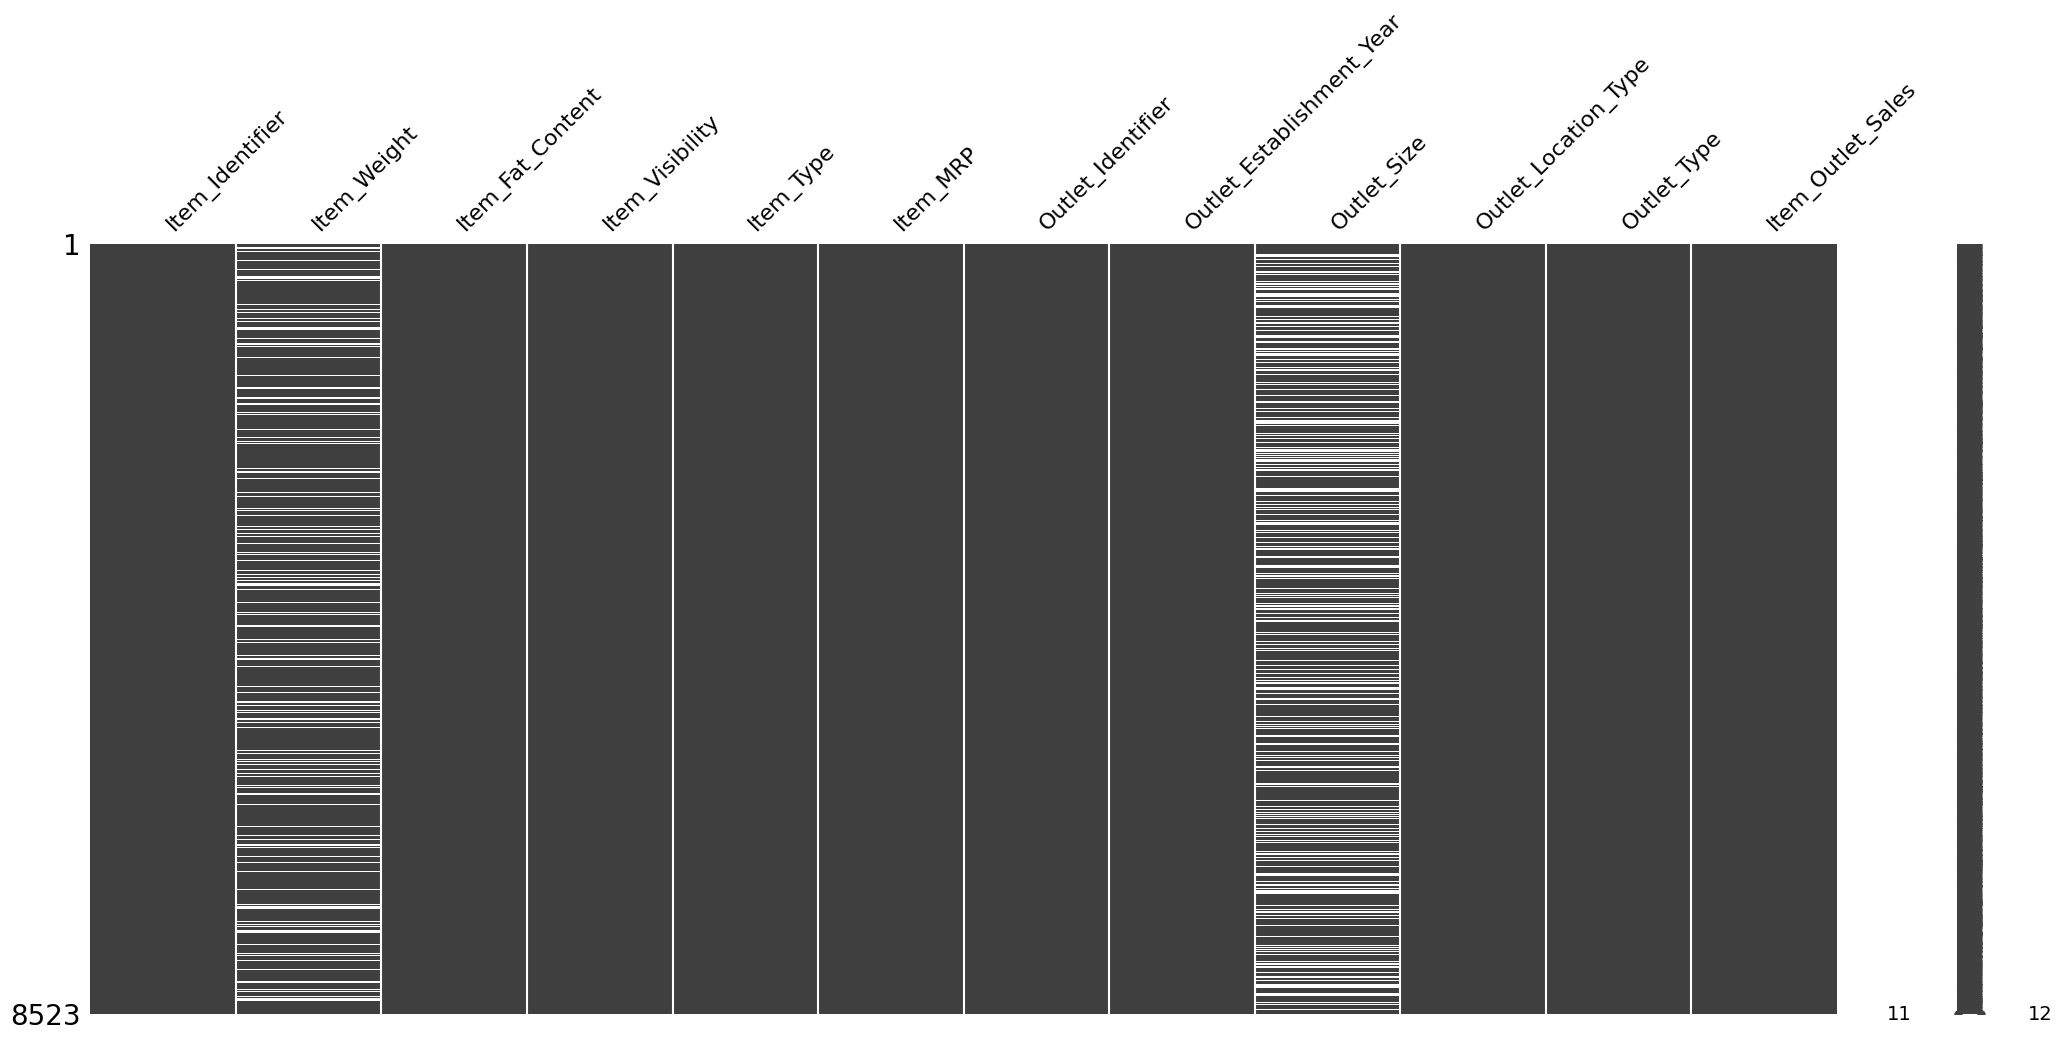

In [13]:
# Visualization of the missing values
msno.matrix(df);

Replace missing values in categorical columns with "MISSING"

In [14]:
# Create a list of categorical column names
cat_columns = df.select_dtypes('object').columns

# Use the list of categorical columns to fill null values with MISSING
df[cat_columns] = df[cat_columns].fillna('MISSING')

# Confirm nulls in categorical columns are replaced successfully
df[cat_columns].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

Note: Null values in the categorical variable 'Outlet_Size' are successfully replaced with 'MISSING'.

Replace missing values in numerical columns with -1

In [15]:
# Create a list of numeric column names
num_columns = df.select_dtypes('number').columns

# Use the list of numerical columns to fill null values with -1
df[num_columns] = df[num_columns].fillna(-1)

# Confirm nulls in numerical columns are replaced successfully
df[num_columns].isna().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

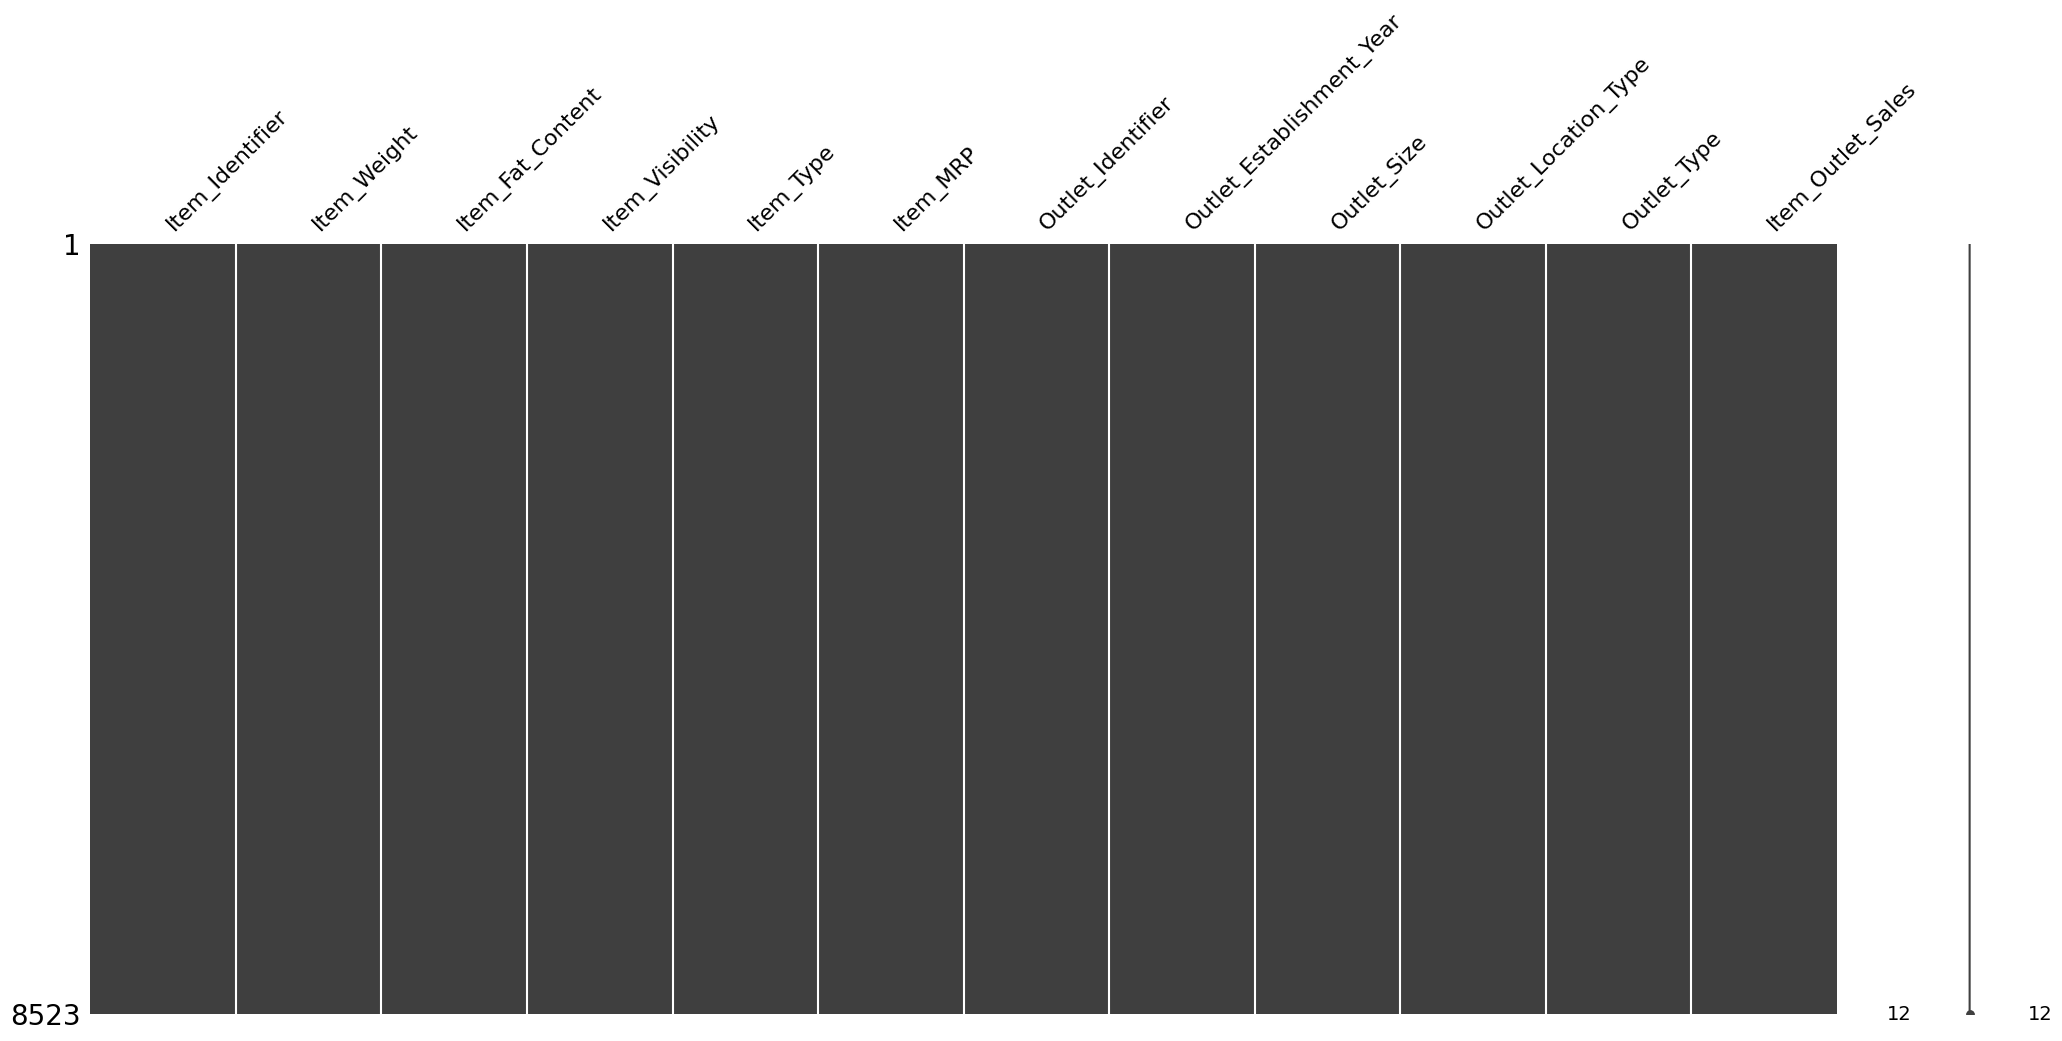

In [16]:
# Recheck visualization of the missing values to reconfirm absence of missing values
msno.matrix(df);

SUMMARY:

All missing values are imputed accordingly.

#### Check and Fix Consistency

In [17]:
# Save a list of string columns
obj_columns = df.select_dtypes(['object', 'string']).columns

# Check the # of unique values for the string columns
df[obj_columns].nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

Note: Will not check the Item_identifier for consistency since it is not possible to know if the identifier is indeed consistent due to its many possible values.

In [18]:
# Save to a variable the list of all the columns that will be checked for consistency
obj_columns = df.select_dtypes(['object', 'string']).drop(columns = 'Item_Identifier').columns

In [19]:
# loop through the list of string columns to check for value consistency
for col in obj_columns:
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: Int64


Medium     2793
MISSING 

Note: For the ***Item_Fat_Content*** column, the values should only be either 'Low Fat' or 'Regular'. Meanwhile, for the ***Outlet_Size*** column, values should either be Small, Medium, or Large.

In [20]:
# Replace miscoded entries in the Item_Fat_Content column with the expected values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# Replace miscoded entries in the Outlet_Size column with the expected values
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
# Check the value counts again to confirm
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

SUMMARY:

The dataframe was checked for consistency. Certain columns are fixed to make their values consistent with the expectation.

## Exploratory Data Analysis

#### Correlation among the numerical features in the dataset

In [44]:
# Get the correlation among columns and save it to a variable
corr = df.corr(numeric_only = True)

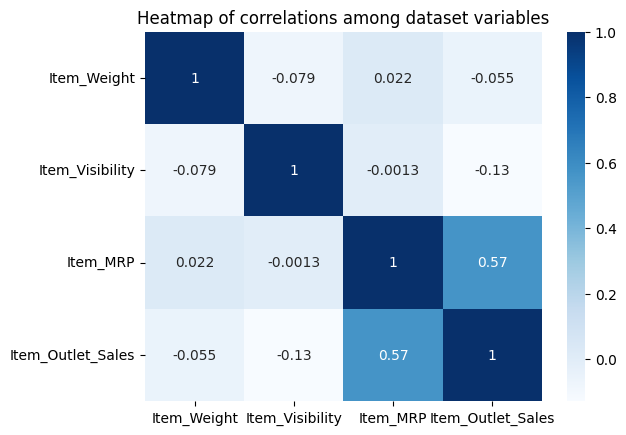

In [45]:
ax1 = sns.heatmap(corr, cmap = 'Blues', annot = True);
ax1.set(title = 'Heatmap of correlations among dataset variables');

Observations:
* There is a moderate positive correlation between the Item_MRP and Item_Outlet_Sales with a correlation coefficient of 0.57.
* The positive relationship between the item MRP and outlet sales can be an expected result since a higher MRP may lead to higher outlet sales.
* Surprisingly, the visibility of the items in stores does not have a significant correlation with the outlet sales.

#### Distribution of outlet sales per outlet type, and outlet location type

In [70]:
# Generate the descriptive statistics from the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,2181.288914
std,6.720742,0.051598,62.275067,1706.499616
min,-1.000000,0.000000,31.290000,33.290000
25%,6.650000,0.026989,93.826500,834.247400
50%,11.000000,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


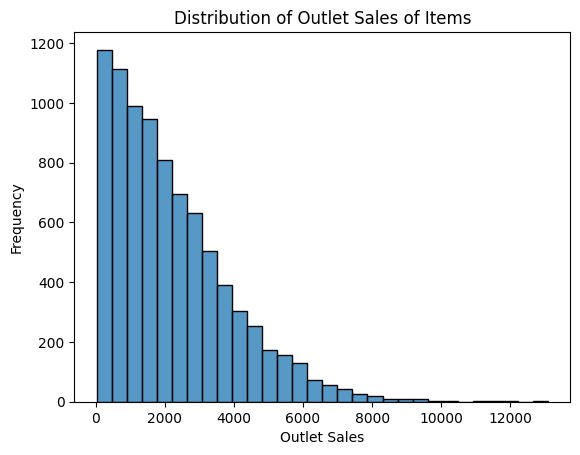

In [71]:
# Create a histogram of Item_Outlet_Sales
ax2 = sns.histplot(data = df, x = 'Item_Outlet_Sales', bins = 30);
ax2.set(title = 'Distribution of Outlet Sales of Items', ylabel = 'Frequency', xlabel = 'Outlet Sales');

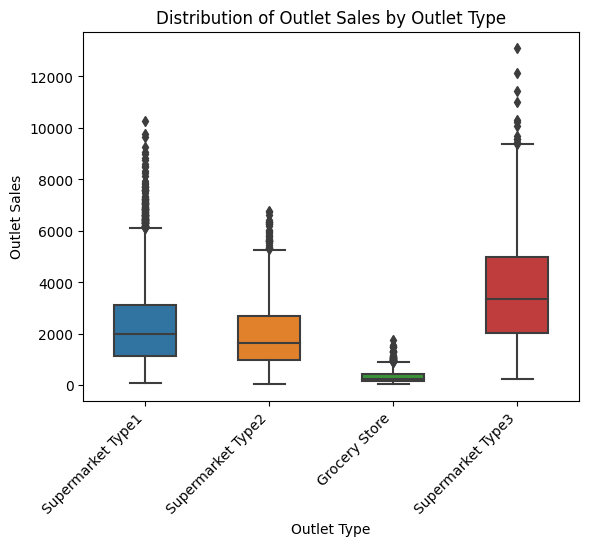

In [72]:
# Create a boxplot of the values of Item_Outlet_Sales per outlet type
ax3 = sns.boxplot(data = df, y = 'Item_Outlet_Sales', width = 0.5, x = 'Outlet_Type')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right');
ax3.set(title = 'Distribution of Outlet Sales by Outlet Type', ylabel = 'Outlet Sales', xlabel = 'Outlet Type');

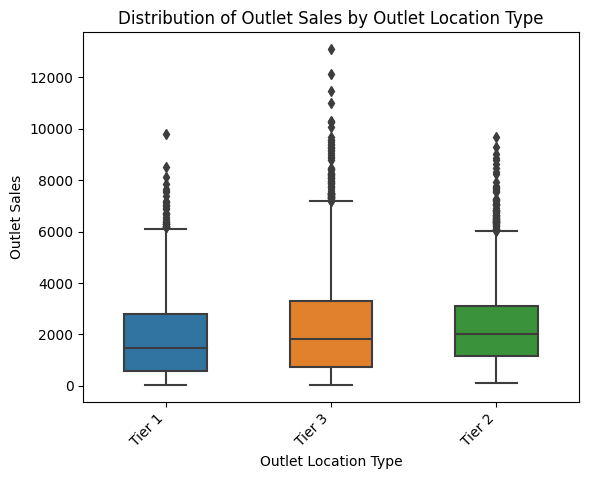

In [73]:
# Create a boxplot of the values of Item_Outlet_Sales per outlet location type
ax4 = sns.boxplot(data = df, y = 'Item_Outlet_Sales', width = 0.5, x = 'Outlet_Location_Type')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right');
ax4.set(title = 'Distribution of Outlet Sales by Outlet Location Type', ylabel = 'Outlet Sales', xlabel = 'Outlet Location Type');

Observations:

* The mean outlet sales in all stores is ~2181 currency units with a maximum of ~13,000 currency units. The standard deviation is high though, hinting that the outlet sales amounts are spread on a wide range of values.
* A significant number of sales were recorded from lower priced items (< 8000 currency units). See the **Distribution of Outlet Sales of Items**.
* In detail, grocery stores have their sales figures concentrated on lower priced items (< 2000 units), while Supermarket Type 3 have sales figures ranging from 0 to ~13,000 units. See the **Distribution of Outlet Sales by Outlet Type**.
* Supermarkets are outlets of items with higher prices. Specifically, supermarkets located at Tier 3 locations sold high priced items (> 10,000 units). See the **Distribution of Outlet Sales by Outlet Location Type**.

#### Average outlet sales per outlet type and outlet location type

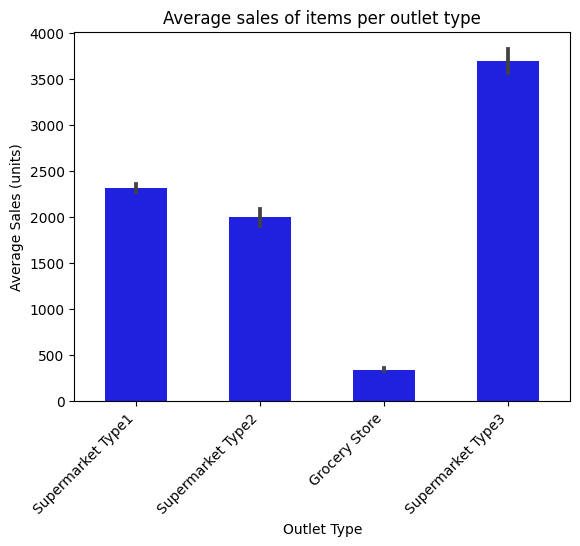

In [85]:
# Create a barplot of the average sales amount of sold items in stores per outlet type
ax5 = sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', color = 'blue', width = 0.5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right');
ax5.set(title = 'Average sales of items per outlet type', xlabel = 'Outlet Type', ylabel = 'Average Sales (units)');

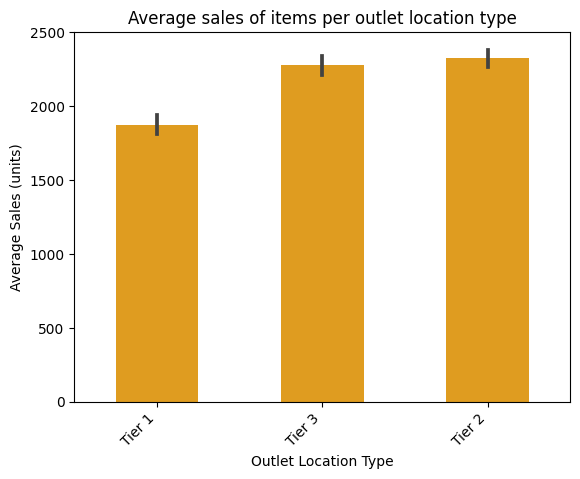

In [84]:
# Create a barplot of the average amount of items sold in stores per
ax6 = sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', color = 'orange', width = 0.5)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right');
ax6.set(title = 'Average sales of items per outlet location type', xlabel = 'Outlet Location Type', ylabel = 'Average Sales (units)');

Observations:

* Supermarket 3 earned the highest average sales. Grocery stores earned the lowest.
* Stores in tier 2 and 3 locations have notably higher average sales compared to that of tier 1 locations.

#### Number of items sold per item type

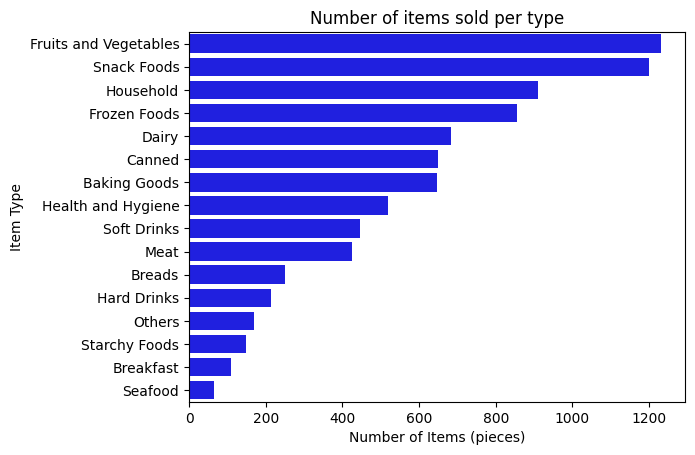

In [75]:
# Create a countplot of the total number of items available in the stores per item type
order1 = df['Item_Type'].value_counts().index;
ax6 = sns.countplot(data = df, y = 'Item_Type', color = 'blue', order = order1)
ax6.set(title = 'Number of items sold per type', ylabel = 'Item Type', xlabel = 'Number of Items (pieces)');

One can check the top items being sold in each individual outlet store types, as follows:

(a) Top items in grocery stores

In [24]:
# Check the top items sold in grocery stores
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Grocery Store']

Item_Type
Fruits and Vegetables    152
Snack Foods              146
Household                119
Frozen Foods             103
Dairy                     92
Baking Goods              85
Canned                    73
Health and Hygiene        67
Meat                      66
Soft Drinks               54
Breads                    33
Others                    27
Hard Drinks               24
Breakfast                 19
Starchy Foods             13
Seafood                   10
Name: Item_Type, dtype: int64

(b) Top items in type 1 supermarkets

In [25]:
# Check the top items sold in type 1 supermarkets
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Supermarket Type1']

Item_Type
Fruits and Vegetables    805
Snack Foods              785
Household                597
Frozen Foods             572
Dairy                    450
Baking Goods             426
Canned                   426
Health and Hygiene       335
Soft Drinks              300
Meat                     257
Breads                   160
Hard Drinks              145
Others                   107
Starchy Foods            104
Breakfast                 68
Seafood                   40
Name: Item_Type, dtype: int64

(c) Top items in type 2 supermarkets

In [26]:
# Check the top items sold in type 2 supermarkets
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Supermarket Type2']

Item_Type
Fruits and Vegetables    135
Snack Foods              132
Household                 95
Frozen Foods              92
Canned                    78
Dairy                     73
Baking Goods              68
Health and Hygiene        58
Meat                      46
Soft Drinks               46
Breads                    27
Hard Drinks               22
Others                    20
Starchy Foods             17
Breakfast                 12
Seafood                    7
Name: Item_Type, dtype: int64

(d) Top items in type 3 supermarkets

In [27]:
# Check the top items sold in type 3 supermarkets
df.groupby(by = 'Outlet_Type')['Item_Type'].value_counts()['Supermarket Type3']

Item_Type
Fruits and Vegetables    140
Snack Foods              137
Household                 99
Frozen Foods              89
Canned                    72
Baking Goods              69
Dairy                     67
Health and Hygiene        60
Meat                      56
Soft Drinks               45
Breads                    31
Hard Drinks               23
Others                    15
Starchy Foods             14
Breakfast                 11
Seafood                    7
Name: Item_Type, dtype: int64

Observations:
* Fruits and vegetables are the abundant items sold in all stores, followed by snack foods and household items.
* This trend is consistent in all store types: groceries and supermarkets of all types.

## Feature Inspection